**Modern portfolio theory (MPT)**

The Modern portfolio theory (MPT) is a mathematical framework for assembling a portfolio of assets such that the expected return is maximized for a given level of volatility. It is a formalization of diversification in investing, i.e., the idea that owning different kinds of financial assets is less risky than owning only one assets.

**Efficient Frontiers**

In the MPT, the efficient frontier is an a curve which occupies the efficient part of the volatility-return plane. Formally, it is the set of portfolios that can be constructed with the given input assets that have the maximum expected returns for a fixed level of volatility and, in turn, the lowest volatilities for a fixed level of expected return. The efficient frontier was first formulated by Harry Markowitz (1952).

**I have taken the portfolio of the stocks of Facebook(FB), Deutsche Bank(DB), Apple (AAPL), MIcrosoft (MSFT), Amazon (AMZN), and CocaCola(KO)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use("seaborn-dark")

In [3]:
df = pd.read_csv('New_six1.csv', index_col=0)
df.head()

,FB,DB,AAPL,MSFT,AMZN,KO
Date,,,,,,
2015-03-30,83.199997,32.780529,28.942627,36.741619,374.589996,33.818066
2015-03-31,82.220001,32.555553,28.498304,36.472504,372.100006,33.851452
2015-04-01,81.669998,33.089867,28.457081,36.526333,370.260010,33.959988
2015-04-02,81.559998,33.464825,28.702143,36.140625,372.250000,33.959988
2015-04-06,82.440002,33.802280,29.167072,37.270851,377.040009,34.369038


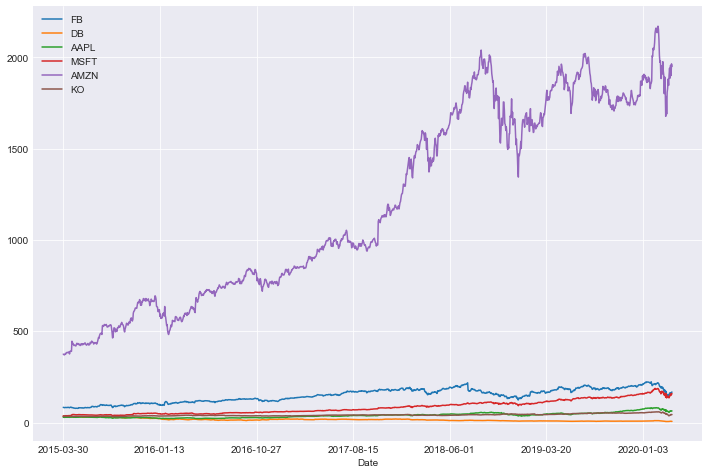

In [27]:
df.plot(figsize=(12,8), grid=True)

# Plot of return

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD93566288>,
      dtype=object)

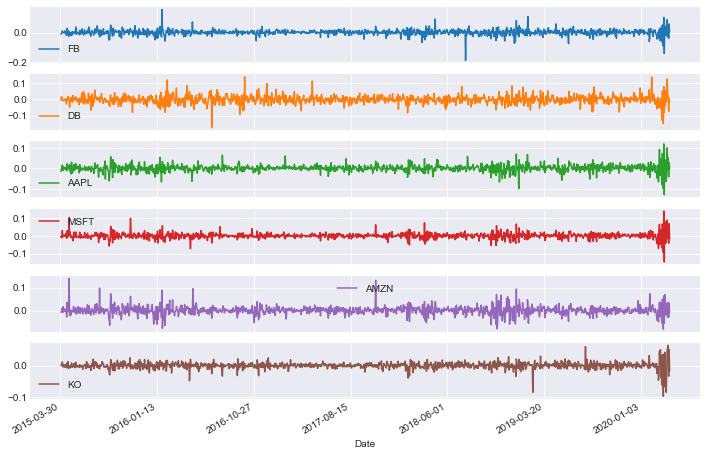

In [29]:
ft.compute_returns(df).plot(figsize=(12,8), grid=True, subplots=True)

In [9]:
import Finkit as ft

In [5]:
n_portfolio = 4000
n_assets = 6
periods_per_year = 252
risk_free_rate = 0.07

# Monte-Carlo simulations of the portfolio

In [19]:
port_df = ft.portfolios(df, n_portfolio, periods_per_year, n_assets, risk_free_rate)
port_df.head()

,return,volatility,sharpe ratio
0,0.048360,0.225537,-1.523176
1,0.139401,0.214194,5.143515
2,0.110402,0.229443,2.795278
3,0.208921,0.235294,9.372528
4,0.062419,0.236790,-0.508252


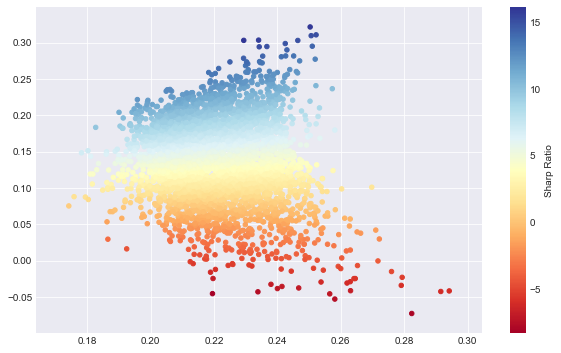

In [22]:
plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(port_df['volatility'], port_df['return'], c=port_df['sharpe ratio'], s=20, edgecolor=None, cmap='RdYlBu')
plt.colorbar(label='Sharp Ratio')

# Calculation of efficient front

In [15]:
eff = ft.efficient_front(df, 0.07, 252)

In [16]:
eff.head()

,volatility,return,sharpe ratio,0,1,2,3,4,5
0,0.177060,1.277436e-12,-0.395347,0.042704,0.169170,0.000000,0.000000e+00,0.000000e+00,0.788126
1,0.175063,7.976721e-03,-0.354292,0.044601,0.147021,0.004118,0.000000e+00,0.000000e+00,0.804260
2,0.173411,1.595344e-02,-0.311668,0.052267,0.129960,0.017708,0.000000e+00,0.000000e+00,0.800065
3,0.172027,2.393016e-02,-0.267806,0.060024,0.112909,0.031250,0.000000e+00,2.168404e-19,0.795818
4,0.170917,3.190689e-02,-0.222874,0.067868,0.095826,0.044631,2.168404e-19,1.301043e-18,0.791676


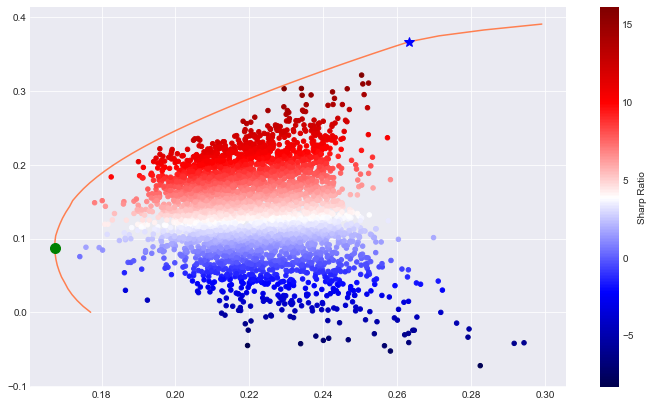

In [25]:
ft.plot_ef(port_df, eff)

# Weights for maximum sharp ratio

In [30]:
eff[eff["sharpe ratio"]==max(eff["sharpe ratio"])]

,volatility,return,sharpe ratio,0,1,2,3,4,5
46,0.263154,0.366929,1.128348,0.0,9.740811e-19,2.168404e-19,0.431226,0.566863,0.001911


# Weights for minimum volatility

In [31]:
eff[eff["volatility"]==min(eff["volatility"])]

,volatility,return,sharpe ratio,0,1,2,3,4,5
11,0.167376,0.087744,0.106012,0.057486,0.030918,0.04509,0.0,0.104309,0.762197
